In [4]:
pip install imbalanced-learn


Note: you may need to restart the kernel to use updated packages.


Loaded: (284807, 31)
Fraud cases: 492 / 284807

	 Logistic Regression 
              precision    recall  f1-score   support

           0       1.00      0.97      0.99     56864
           1       0.06      0.92      0.11        98

    accuracy                           0.97     56962
   macro avg       0.53      0.95      0.55     56962
weighted avg       1.00      0.97      0.99     56962


 Training Random Forest...

	 Random Forest
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.96      0.76      0.85        98

    accuracy                           1.00     56962
   macro avg       0.98      0.88      0.92     56962
weighted avg       1.00      1.00      1.00     56962



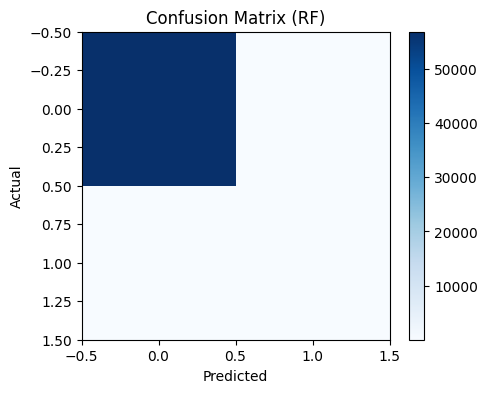

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix


df = pd.read_csv("creditcard.csv")
print("Loaded:", df.shape)

#cleanup 
scaler = StandardScaler()
df["scaled_amount"] = scaler.fit_transform(df["Amount"].values.reshape(-1,1))
df = df.drop(["Amount","Time"], axis=1)   # these two aren't very helpful
X = df.drop("Class", axis=1)
y = df["Class"]
print("Fraud cases:", y.sum(), "/", len(y))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

lr = LogisticRegression(max_iter=250, class_weight="balanced")
lr.fit(X_train, y_train)
pred_lr = lr.predict(X_test)

print("\n\t Logistic Regression ")
print(classification_report(y_test, pred_lr))

rf = RandomForestClassifier(
    n_estimators=60,random_state=42,
    n_jobs=-1,class_weight="balanced"
)

print("\n Training Random Forest...")
rf.fit(X_train, y_train)
pred_rf = rf.predict(X_test)

print("\n\t Random Forest")
print(classification_report(y_test, pred_rf))

#confusion matrix
cm = confusion_matrix(y_test, pred_rf)
plt.figure(figsize=(5,4))
plt.imshow(cm, cmap="Blues")
plt.title("Confusion Matrix (RF)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.colorbar()
plt.show()
